# 0. Import Data

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [64]:
df_dirty = pd.read_csv('/content/comb_data3.csv')

In [65]:
df = df_dirty.dropna()
X = pd.get_dummies(df.drop(['Stress score','Street Name','SW ID'], axis=1))
y = df['Stress score']

In [66]:
X.head()

,Number of Uplifts,Width (ft),SCI 2023
0,10.0,6.62,58.0
1,10.0,6.62,58.0
2,10.0,6.62,58.0
3,10.0,6.62,58.0
4,10.0,6.62,58.0


In [67]:
y.head()

0    23.497719
1    22.559360
2    21.664820
3    20.759432
4    19.896809
Name: Stress score, dtype: float64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [69]:
from sklearn.preprocessing import MinMaxScaler

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_train.astype(np.float32)
y_test = y_train.astype(np.float32)

# Initialize the scaler
scaler = MinMaxScaler()
print(f"Before {X_train}")
# Fit on training data and transform both training and test data
X_train = scaler.fit_transform(X_train) #why are these different things? Do the same thing to both data sets
X_test = scaler.transform(X_test)
print(f"AFter {X_train}")


Before        Number of Uplifts  Width (ft)  SCI 2023
56857               41.0    5.500000       9.0
60824                8.0   16.120001      50.0
9621                 4.0   10.000000      92.0
33584                7.0    8.000000      59.0
7387                 1.0    7.250000      87.0
...                  ...         ...       ...
48846                4.0   10.000000      92.0
46522               15.0    5.500000      40.0
27395               48.0    7.120000      18.0
33673                7.0    8.000000      59.0
2042                48.0    7.120000      18.0

[54987 rows x 3 columns]
AFter [[0.43157896 0.05128206 0.09      ]
 [0.08421053 0.5958975  0.5       ]
 [0.04210526 0.28205132 0.91999996]
 ...
 [0.5052632  0.13435896 0.17999999]
 [0.07368422 0.17948718 0.59      ]
 [0.5052632  0.13435896 0.17999999]]


In [70]:
y_train.head()

56857     0.247480
60824     4.989629
9621     10.848424
33584     1.042519
7387     16.662590
Name: Stress score, dtype: float32

# 1. Import Dependencies

In [71]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# 2. Build and Compile Model

In [72]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_train.astype(np.float32)
y_test = y_train.astype(np.float32) # you already did this earlier

In [73]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=(X_train.shape[1])))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))

In [74]:
#model.compile(loss='mse', optimizer='adam', metrics='accuracy')
''' model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy') '''
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


# 3. Fit, Predict and Evaluate

In [75]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 186.7527 - mean_absolute_error: 9.4111
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 177.5662 - mean_absolute_error: 9.2685
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 173.3155 - mean_absolute_error: 9.1251
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 170.9576 - mean_absolute_error: 9.0287
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 170.0362 - mean_absolute_error: 8.9756
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 169.5016 - mean_absolute_error: 8.9530
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 169.1203 - mean_absolute_error: 8.9307
Epoch 8/100
1719/1719 [==============================] - 3s 2ms/step - loss: 168.5499 - mean_absolute_error: 8.9055
Epoch 9/100
1719/1719 [==============================] - 4s 2ms/step - l

In [76]:
y_hat = model.predict(X_test)
print(y_hat)
print(y_test)

1719/1719 [==============================] - 3s 2ms/step
[[ 2.8131907]
 [ 2.8906229]
 [17.955301 ]
 ...
 [ 9.799903 ]
 [15.597286 ]
 [ 9.799903 ]]
56857     0.247480
60824     4.989629
9621     10.848424
33584     1.042519
7387     16.662590
           ...    
48846    20.120094
46522    14.985312
27395     5.860345
33673    25.327154
2042      1.882783
Name: Stress score, Length: 54987, dtype: float32


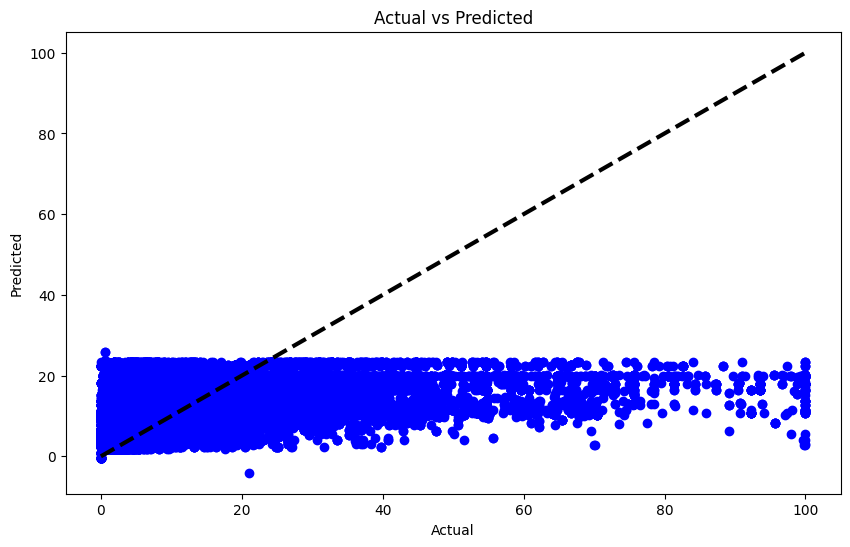

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()